In [59]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import transforms
from pathlib import Path
result_folder = Path("../results")
result_folder_images = result_folder / "images"

def get_df_cosine(file_path: str, columns):
    data = np.loadtxt(file_path, dtype=str, delimiter="\t")
    sorted_indices = np.argsort(data[1].astype(float))[::-1]
    values = data[1].astype(float)[sorted_indices]
    labels = data[0][sorted_indices]
    df = pd.DataFrame(values)
    df.index = labels
    df.columns = columns
    return df, values


def get_df_jens(file_path: str, columns):
    data = np.loadtxt(file_path, dtype=str, delimiter="\t")
    values = data[1].astype(float)
    sorted_indices = np.argsort(values)
    values = values[sorted_indices]
    labels = data[0][sorted_indices]
    df = pd.DataFrame(values)
    df.index = labels
    df.columns = columns
    return df, values


In [ ]:
file_path = result_folder / "cosine.params.similarity.txt"
data = np.loadtxt(file_path, dtype=str, delimiter="\t")
sorted_indices = np.argsort(data[:-1, 1].astype(float))[::-1]
values = data[sorted_indices, 1].astype(float)
labels = data[sorted_indices, 0]
labels = np.array([" ".join(i.split("_")) for i in labels])
df = pd.DataFrame(values)
df.columns = ["Parameters: (Init, Beta loss)"]
df.index = labels
tr = transforms.Affine2D().rotate_deg(90)
ax = sns.heatmap(df, linewidth=.5, fmt = "", annot=values.reshape(-1, 1), cmap="crest", xticklabels=True, yticklabels=True)
ax.set(ylabel="Cosine Similiarity")
plt.savefig(result_folder_images / "cosine.params.similarityp.png", bbox_inches="tight", format="png", dpi=300, pad_inches=0.1)
plt.show(tr)

In [ ]:
file_path = result_folder / "cosine.similarity.decompose.txt"
data = np.loadtxt(file_path, dtype=str, delimiter="\t")
sorted_indices = np.argsort(data[1].astype(float))[::-1]
values = data[1].astype(float)[sorted_indices]
labels = data[0][sorted_indices]
df = pd.DataFrame(values)
df.index = labels
df.columns = ["Cosine similiarity"]
plt.figure(figsize=(5, 24))
tr = transforms.Affine2D().rotate_deg(90)
ax = sns.heatmap(df, linewidth=.5, fmt = "", cmap="crest", annot = values.reshape(-1, 1), xticklabels=True, yticklabels=True, cbar_kws = dict(use_gridspec=False,location="top"))
ax.set(ylabel="Cosine Similiarity")
plt.savefig(result_folder_images / "cosine.similarity.decompose.heatmap.png", bbox_inches="tight", format="png", dpi=300, pad_inches=0.1)
plt.show(tr)

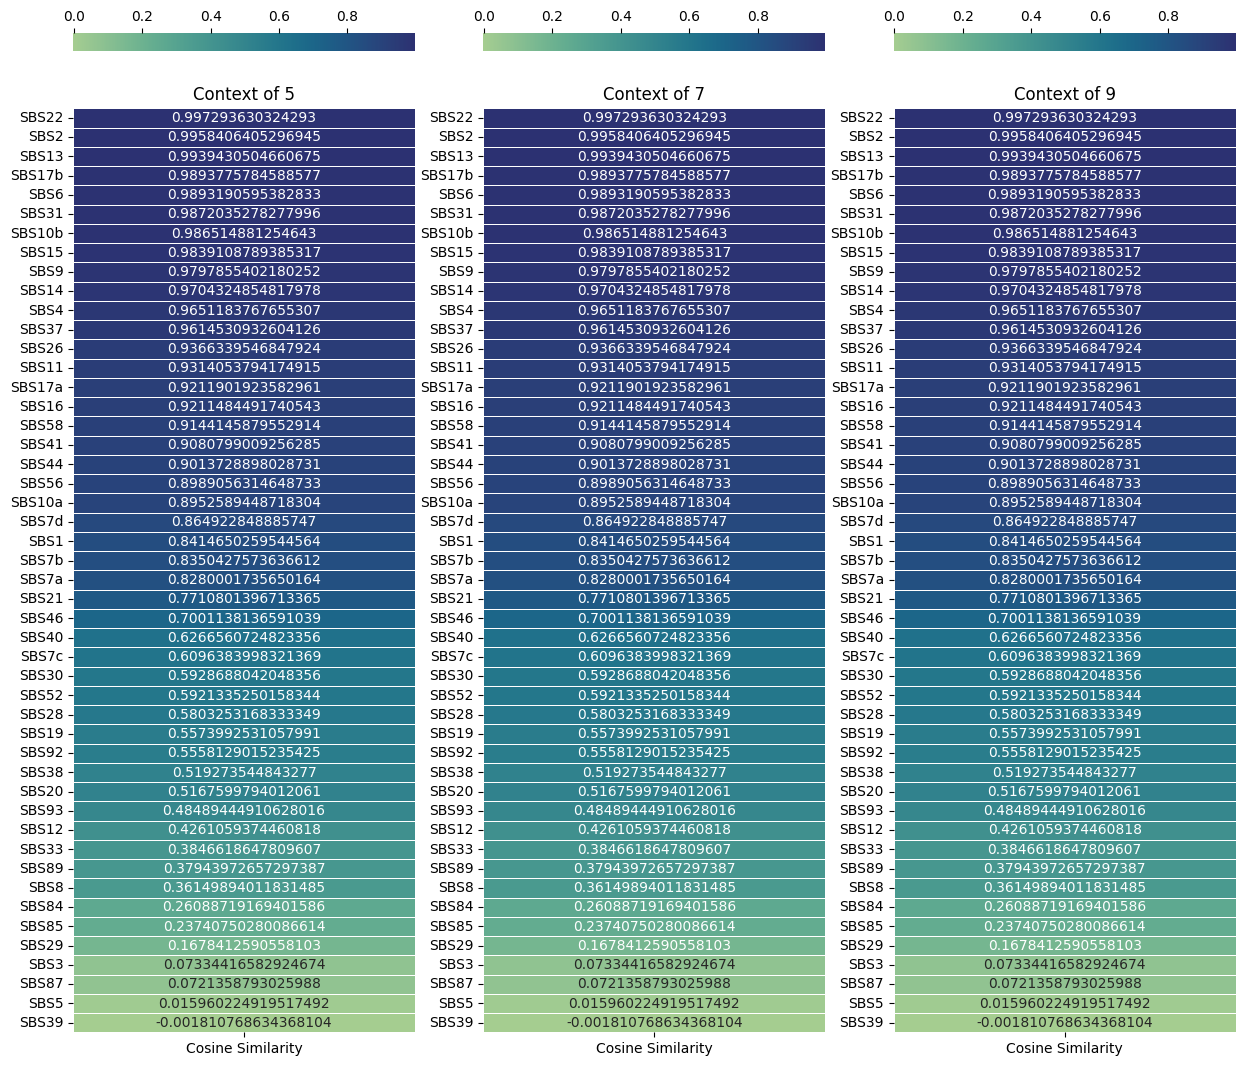

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
df1, values = get_df_cosine(result_folder / "cosine.1536.dist.txt", columns=["Cosine Similarity"])
sns.heatmap(df1, linewidth=.5, fmt = "", cmap="crest", ax=axes[0], annot = values.reshape(-1, 1), xticklabels=True, yticklabels=True, cbar_kws = dict(use_gridspec=False,location="top"))
axes[0].set_title('Context of 5')

df, values = get_df_cosine(result_folder / "cosine.24576.dist.txt", columns=["Cosine Similarity"])
sns.heatmap(df, linewidth=.5, fmt = "", cmap="crest", ax=axes[1], annot = values.reshape(-1, 1), xticklabels=True, yticklabels=True, cbar_kws = dict(use_gridspec=False,location="top"))
axes[1].set_title('Context of 7')

df, values = get_df_cosine(result_folder / "cosine.393216.dist.txt", columns=["Cosine Similarity"])
sns.heatmap(df, linewidth=.5, fmt = "", cmap="crest", ax=axes[2], annot = values.reshape(-1, 1), xticklabels=True, yticklabels=True, cbar_kws = dict(use_gridspec=False,location="top"))
axes[2].set_title('Context of 9')
plt.savefig(result_folder_images / 'cosine.similarity.increased.context.png', bbox_inches='tight')
plt.show()

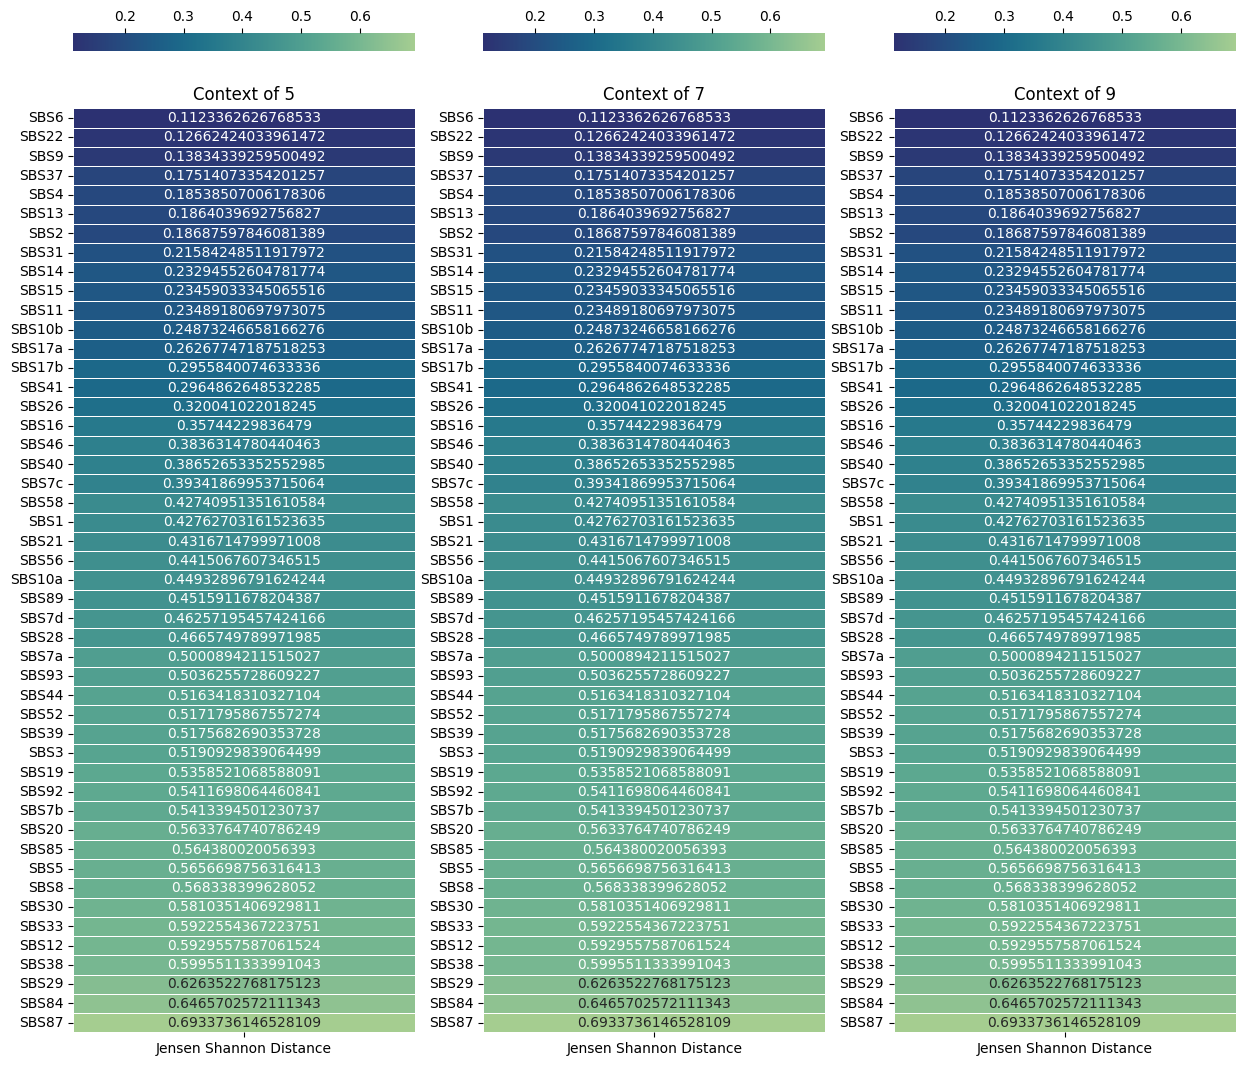

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
df, values = get_df_jens(result_folder / "jensen.1536.dist.txt", columns=["Jensen Shannon Distance"])
sns.heatmap(df, linewidth=.5, fmt = "", cmap="crest_r", ax=axes[0], annot = values.reshape(-1, 1), xticklabels=True, yticklabels=True, cbar_kws = dict(use_gridspec=False,location="top"))
axes[0].set_title('Context of 5')

df, values = get_df_jens(result_folder / "jensen.24576.dist.txt", columns=["Jensen Shannon Distance"])
sns.heatmap(df, linewidth=.5, fmt = "", cmap="crest_r", ax=axes[1], annot = values.reshape(-1, 1), xticklabels=True, yticklabels=True, cbar_kws = dict(use_gridspec=False,location="top"))
axes[1].set_title('Context of 7')

df, values = get_df_jens(result_folder / "jensen.393216.dist.txt", columns=["Jensen Shannon Distance"])
sns.heatmap(df, linewidth=.5, fmt = "", cmap="crest_r", ax=axes[2], annot = values.reshape(-1, 1), xticklabels=True, yticklabels=True, cbar_kws = dict(use_gridspec=False,location="top"))
axes[2].set_title('Context of 9')
plt.savefig(result_folder_images / 'jensen.shannon.distance.increased.context.png', bbox_inches='tight')
plt.show()